In [48]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [49]:
# Update pyplot defaults
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 15),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

# CSV einlesen und preprocessing #

In [50]:
filename = "./survery_data_annonymized_230614.csv"
data = pd.read_csv(filename)
data.head()

,Timestamp,Alter,Geschlecht,"Bitte gib hier ein Pseudonym ein und merke dir dieses (z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene ""Datenpunkt"" gefunden werden. Das Pseudonym wird für Andere sichtbar sein.",Welcher Funktion an der HSD fühlst du dich am meisten zugehörig?,Welchem Studiengang fühlst du dich am meisten zugehörig?,Als wie sportlich würdest du dich einschätzen?,Welche Sportarten interessieren dich am meisten (wähle maximal 5)?,Was ist deine absolute Lieblingssportart?,Welche Rolle spielt für dich gesunde Ernährung?,...,Strebst du nach dem Studium auch weiterhin eine akademische Laufbahn an?,Wie gern lernst Du in der Gruppe?,"Prokrastinierst du, wenn du lernen müsstest?",Wie häufig machst du Abgaben auf den letzten Drücker?,Wie gerne probierst du neue Lebensmittel aus?,Wie häufig verbringst du Zeit in der Natur (z. B. beim Wandern oder Camping)?,Wie häufig verreist du?,Wie interessiert bist du an handwerklichen Tätigkeiten?,Wie gerne magst du Sprachnachrichten?,Wie wichtig ist es dir viel Geld zu verdienen?
0,2023/05/25 9:05:15 AM GMT+3,28,männlich,lalala-lololo,Student*in,MMI,4,Basketball;Yoga;Bouldern/Klettern;Rennrad/Moun...,Joggen,4,...,1,5,3,2,5,5,2,2,3,3
1,2023/05/25 9:21:27 AM GMT+3,26,männlich,hbstr,Student*in,MMI,3,Fußball;Volleyball;Yoga;Bouldern/Klettern;Renn...,Fußball,4,...,3,3,2,2,4,3,3,4,3,4
2,2023/05/25 10:10:57 AM GMT+3,24,männlich,Panda,Student*in,MMI,2,Fußball;Handball;Yoga;Tanzen;Bouldern/Klettern,-,5,...,3,5,5,1,3,2,3,2,4,3
3,2023/05/30 11:25:32 PM GMT+3,23,männlich,TomTom Navigation,Student*in,MMI,5,Leichtathletik;Bouldern/Klettern;Wintersport,Trampolin,2,...,2,2,2,3,5,4,4,2,3,3
4,2023/05/31 11:17:51 AM GMT+3,24,weiblich,LcAbrgr,Student*in,MMI,3,Bouldern/Klettern,Klettern,4,...,1,1,5,5,2,3,4,3,3,4


## Einen Zeilenumbruch nach 50 Zeichen einfügen, um lange Titel besser darzustellen ##

In [51]:
import re

def insert_linebreaks(title):
    linebreak_limit = 50

    if len(title) < linebreak_limit:
        return title
    else:
        part_after_limit = title[linebreak_limit:]
        # replace first whitespace after limit with linebreak
        part_after_limit = re.sub(r"\s+", "\n", part_after_limit, 1)
        return title[:linebreak_limit] + part_after_limit

data.rename(columns=lambda title: insert_linebreaks(title), inplace=True)
data.head()

,Timestamp,Alter,Geschlecht,"Bitte gib hier ein Pseudonym ein und merke dir dieses\n(z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene ""Datenpunkt"" gefunden werden. Das Pseudonym wird für Andere sichtbar sein.",Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?,Welchem Studiengang fühlst du dich am meisten zugehörig?,Als wie sportlich würdest du dich einschätzen?,Welche Sportarten interessieren dich am meisten (wähle\nmaximal 5)?,Was ist deine absolute Lieblingssportart?,Welche Rolle spielt für dich gesunde Ernährung?,...,Strebst du nach dem Studium auch weiterhin eine akademische\nLaufbahn an?,Wie gern lernst Du in der Gruppe?,"Prokrastinierst du, wenn du lernen müsstest?",Wie häufig machst du Abgaben auf den letzten Drücker?,Wie gerne probierst du neue Lebensmittel aus?,Wie häufig verbringst du Zeit in der Natur (z. B. beim\nWandern oder Camping)?,Wie häufig verreist du?,Wie interessiert bist du an handwerklichen Tätigkeiten?,Wie gerne magst du Sprachnachrichten?,Wie wichtig ist es dir viel Geld zu verdienen?
0,2023/05/25 9:05:15 AM GMT+3,28,männlich,lalala-lololo,Student*in,MMI,4,Basketball;Yoga;Bouldern/Klettern;Rennrad/Moun...,Joggen,4,...,1,5,3,2,5,5,2,2,3,3
1,2023/05/25 9:21:27 AM GMT+3,26,männlich,hbstr,Student*in,MMI,3,Fußball;Volleyball;Yoga;Bouldern/Klettern;Renn...,Fußball,4,...,3,3,2,2,4,3,3,4,3,4
2,2023/05/25 10:10:57 AM GMT+3,24,männlich,Panda,Student*in,MMI,2,Fußball;Handball;Yoga;Tanzen;Bouldern/Klettern,-,5,...,3,5,5,1,3,2,3,2,4,3
3,2023/05/30 11:25:32 PM GMT+3,23,männlich,TomTom Navigation,Student*in,MMI,5,Leichtathletik;Bouldern/Klettern;Wintersport,Trampolin,2,...,2,2,2,3,5,4,4,2,3,3
4,2023/05/31 11:17:51 AM GMT+3,24,weiblich,LcAbrgr,Student*in,MMI,3,Bouldern/Klettern,Klettern,4,...,1,1,5,5,2,3,4,3,3,4


## One Hot Encoding für "Welche Sportarten interessieren dich am meisten?" (Multiselect) ##

In [52]:
sports_column_name = "Welche Sportarten interessieren dich am meisten (wähle\nmaximal 5)?"

encoded_columns = data[sports_column_name].str.get_dummies(sep=";")

data = data.join(encoded_columns)
data = data.drop(sports_column_name, axis=1)
data.head()

,Timestamp,Alter,Geschlecht,"Bitte gib hier ein Pseudonym ein und merke dir dieses\n(z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene ""Datenpunkt"" gefunden werden. Das Pseudonym wird für Andere sichtbar sein.",Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?,Welchem Studiengang fühlst du dich am meisten zugehörig?,Als wie sportlich würdest du dich einschätzen?,Was ist deine absolute Lieblingssportart?,Welche Rolle spielt für dich gesunde Ernährung?,Wie gerne gehst du Essen oder Trinken?,...,Kampfsport,Leichtathletik,Rennrad/Mountainbike,Schwimmen,Tanzen,Tennis,Volleyball,Wassersport,Wintersport,Yoga
0,2023/05/25 9:05:15 AM GMT+3,28,männlich,lalala-lololo,Student*in,MMI,4,Joggen,4,3,...,0,0,1,0,0,0,0,0,0,1
1,2023/05/25 9:21:27 AM GMT+3,26,männlich,hbstr,Student*in,MMI,3,Fußball,4,4,...,0,0,1,0,0,0,1,0,0,1
2,2023/05/25 10:10:57 AM GMT+3,24,männlich,Panda,Student*in,MMI,2,-,5,4,...,0,0,0,0,1,0,0,0,0,1
3,2023/05/30 11:25:32 PM GMT+3,23,männlich,TomTom Navigation,Student*in,MMI,5,Trampolin,2,4,...,0,1,0,0,0,0,0,0,1,0
4,2023/05/31 11:17:51 AM GMT+3,24,weiblich,LcAbrgr,Student*in,MMI,3,Klettern,4,3,...,0,0,0,0,0,0,0,0,0,0


## Kürzere Label für die Spalten ##

In [53]:
short_labels = ["timestamp", "alter", "geschlecht", "pseudonym", "funktion", "studiengang", "sportlichkeit", "lieblingssportart",
          "ernaehrung", "essengehen", "kochen", "feiern", "lieblingsessen", "musik", "lieblingsmusiker", "lesen", "schauspiel",
          "filme", "malen", "museumsbesuche", "videospiele", "social_media", "technologie", "astronomie", "naturwissenschaften",
          "freiwilligenarbeit", "soziales", "introvertiert", "fomo", "spontan", "verwirrt", "gluecklich", "geduldig", "streitlustig",
          "abenteuerlustig", "studienzweifel", "studium_zufriedenheit", "akademische_laufbahn", "lerngruppe", "prokrastinieren",
          "letzter_druecker", "neue_lebensmittel", "natur", "reisen", "handwerk", "sprachnachrichten", "geld",]

short_labels = short_labels + list(encoded_columns.columns)
short_labels

['timestamp',
 'alter',
 'geschlecht',
 'pseudonym',
 'funktion',
 'studiengang',
 'sportlichkeit',
 'lieblingssportart',
 'ernaehrung',
 'essengehen',
 'kochen',
 'feiern',
 'lieblingsessen',
 'musik',
 'lieblingsmusiker',
 'lesen',
 'schauspiel',
 'filme',
 'malen',
 'museumsbesuche',
 'videospiele',
 'social_media',
 'technologie',
 'astronomie',
 'naturwissenschaften',
 'freiwilligenarbeit',
 'soziales',
 'introvertiert',
 'fomo',
 'spontan',
 'verwirrt',
 'gluecklich',
 'geduldig',
 'streitlustig',
 'abenteuerlustig',
 'studienzweifel',
 'studium_zufriedenheit',
 'akademische_laufbahn',
 'lerngruppe',
 'prokrastinieren',
 'letzter_druecker',
 'neue_lebensmittel',
 'natur',
 'reisen',
 'handwerk',
 'sprachnachrichten',
 'geld',
 'Basketball',
 'Bouldern/Klettern',
 'Football',
 'Fußball',
 'Handball',
 'Hockey',
 'Kampfsport',
 'Leichtathletik',
 'Rennrad/Mountainbike',
 'Schwimmen',
 'Tanzen',
 'Tennis',
 'Volleyball',
 'Wassersport',
 'Wintersport',
 'Yoga']

In [54]:
# Create a dictionary with short labels as keys and full questions as values
short_labels_and_full_questions = dict(zip(short_labels, data.columns))

# Convert to series
columns = pd.Series(short_labels_and_full_questions)
columns

data[columns.museumsbesuche].head()

0    2
1    4
2    5
3    3
4    2
Name: Wie gerne besuchst du Museen?, dtype: int64

## Beobachtungen zu den Daten ##

--> "Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in? (nur eine/n angeben)" hat 3 fehlende Einträge \
--> "Was ist dein Lieblingsessen? (nur eines angeben)" hat 1 fehlenden Eintrag

In [55]:
data.describe()

,Alter,Als wie sportlich würdest du dich einschätzen?,Welche Rolle spielt für dich gesunde Ernährung?,Wie gerne gehst du Essen oder Trinken?,Wie gerne kochst du selbst?,Wie gerne gehst du feiern?,Wie sehr interessierst du dich für Musik?,Wie gerne liest Du?,"Wie sehr interessierst du dich für darstellende Künste\nwie Schauspiel, Tanz oder Gesang?","Wie sehr interessierst du sich für Filme, Kino, Fernsehsendungen?",...,Kampfsport,Leichtathletik,Rennrad/Mountainbike,Schwimmen,Tanzen,Tennis,Volleyball,Wassersport,Wintersport,Yoga
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,25.535714,3.535714,3.607143,3.928571,3.964286,2.857143,3.964286,3.035714,2.428571,3.750000,...,0.214286,0.178571,0.285714,0.285714,0.142857,0.071429,0.321429,0.071429,0.035714,0.178571
std,5.646908,0.881167,0.785955,0.716399,0.922241,1.078898,0.881167,1.290482,1.199647,0.887151,...,0.417855,0.390021,0.460044,0.460044,0.356348,0.262265,0.475595,0.262265,0.188982,0.390021
min,18.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.750000,2.000000,1.750000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,3.500000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.250000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,3.250000,4.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,42.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 63 columns):
 #   Column                                                                                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                                                                                                                               28 non-null     object
 1   Alter                                                                                                                                                           

In [57]:
do_columns_have_nan_values = pd.DataFrame(zip(short_labels, data.isna().any().values), columns=["short_label", "has_nan"])
columns_with_nan_values = do_columns_have_nan_values[do_columns_have_nan_values.has_nan == True]
columns_with_nan_values

,short_label,has_nan
12,lieblingsessen,True
14,lieblingsmusiker,True


## TODO: Hier das NaN-Handling ##

## Daten visualisieren ##

### Demographische Daten ###

<Axes: title={'center': 'Welchem Studiengang fühlst du dich am meisten zugehörig?'}>

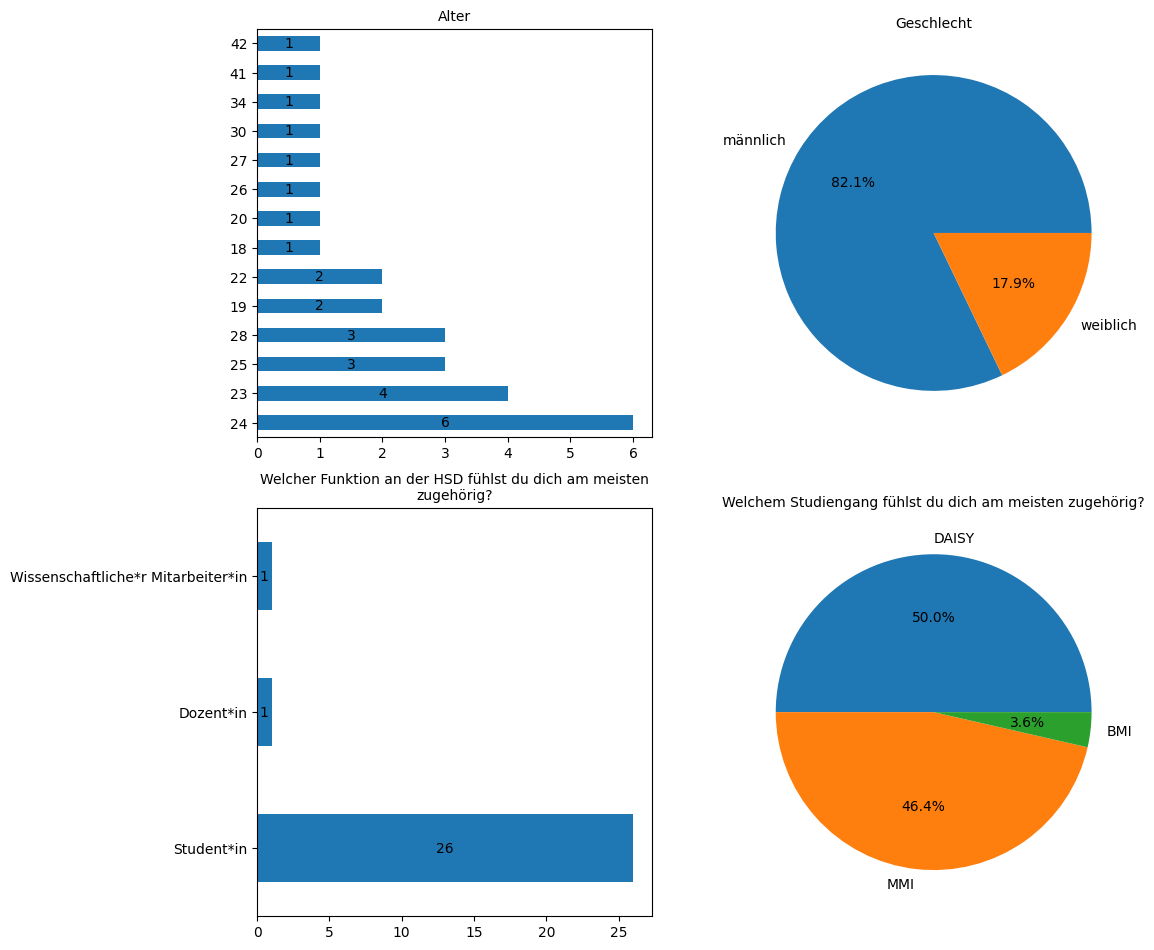

In [58]:
# Plot a chart with 4 subplots showing the distribution of the demographic data
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=3)

alter = data.value_counts(columns.alter).plot.barh(ax=axes[0, 0], title=columns.alter, ylabel="")
alter.bar_label(alter.containers[0], fmt='%.0f', label_type='center')

data.value_counts(columns.geschlecht).plot.pie(ax=axes[0, 1], title=columns.geschlecht, ylabel="", autopct='%1.1f%%')

funktion = data.value_counts(columns.funktion).plot.barh(ax=axes[1, 0], title=columns.funktion, ylabel="")
funktion.bar_label(funktion.containers[0], fmt='%.0f', label_type='center')

data.value_counts(columns.studiengang).plot.pie(ax=axes[1, 1], title=columns.studiengang, ylabel="", autopct='%1.1f%%')

### Skala von Fragen mit Ordinalskala (1-5 Fragen) ###

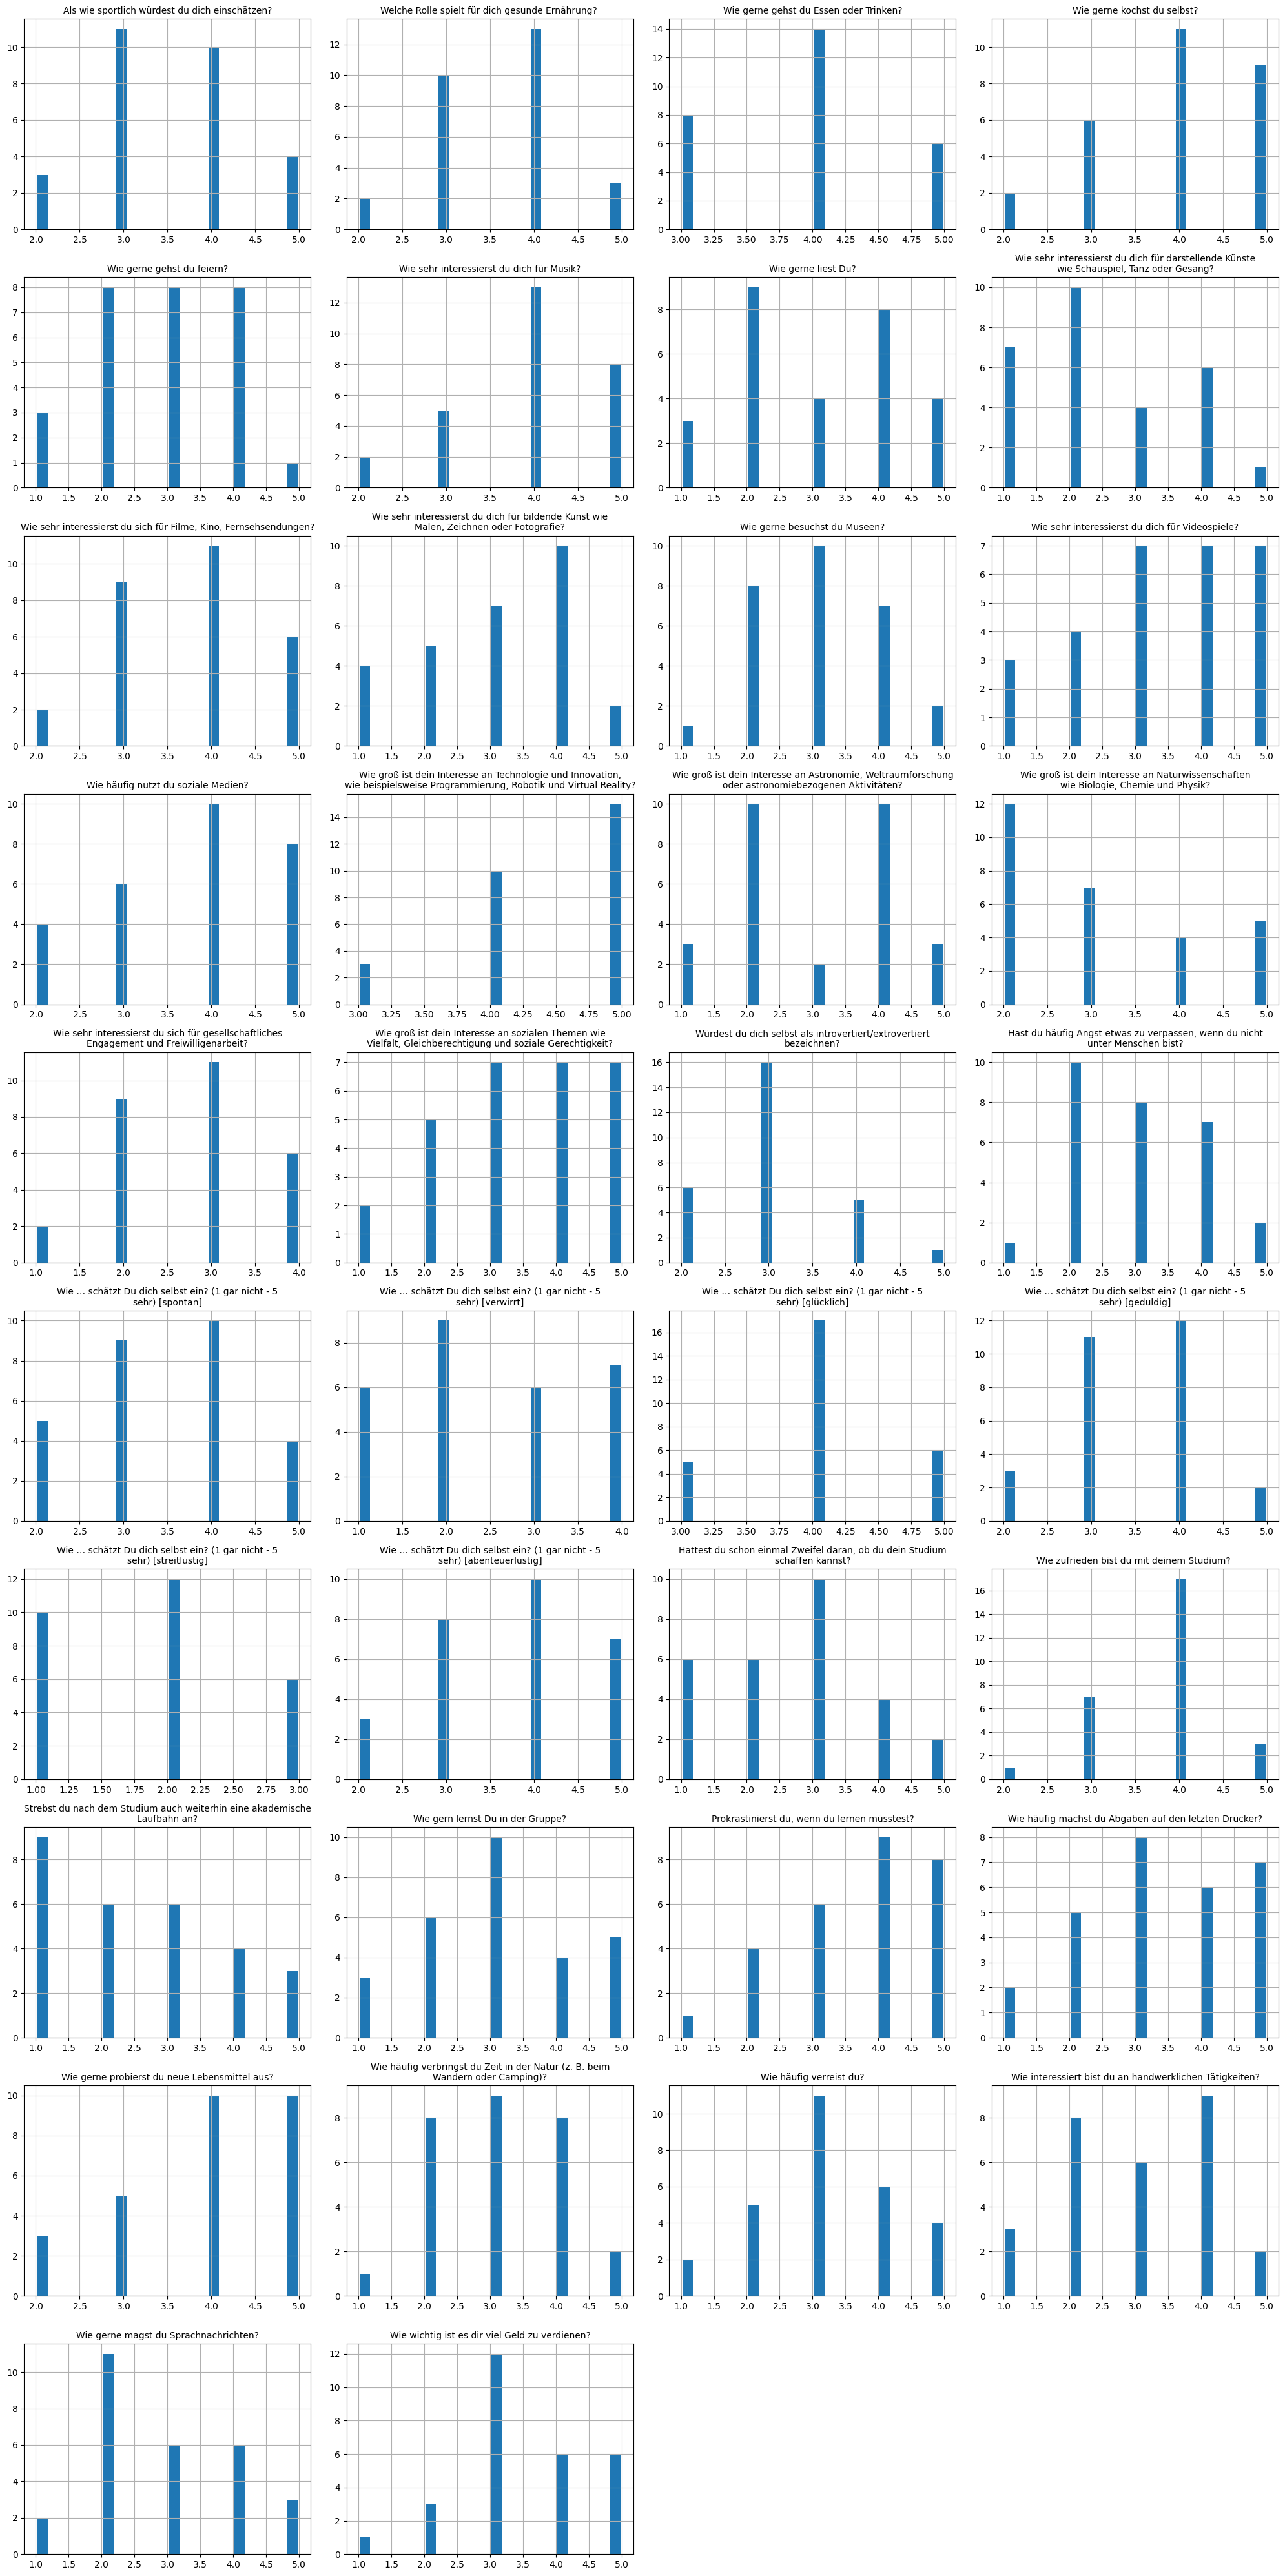

In [59]:
# Plot all numeric columns (including the ordinal data (1-5)) but excluding one-hot-encoded columns and age in a histogram
columns_to_drop = encoded_columns.columns.to_list() + [columns.alter]
data_without_one_hot_encoded_columns_and_age = data.drop(columns_to_drop, axis=1)

data_without_one_hot_encoded_columns_and_age.hist(figsize=(20,40), rwidth=0.8, bins=20, layout=(10, 4))
plt.tight_layout()

### Kategorische Daten ###

In [60]:
non_numeric_colums = data.select_dtypes(exclude=["number"])
non_numeric_colums.describe()

,Timestamp,Geschlecht,"Bitte gib hier ein Pseudonym ein und merke dir dieses\n(z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene ""Datenpunkt"" gefunden werden. Das Pseudonym wird für Andere sichtbar sein.",Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?,Welchem Studiengang fühlst du dich am meisten zugehörig?,Was ist deine absolute Lieblingssportart?,Was ist dein Lieblingsessen? (nur eines angeben),Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)
count,28,28,28,28,28,28,27,25
unique,28,2,28,3,3,24,19,25
top,2023/05/25 9:05:15 AM GMT+3,männlich,lalala-lololo,Student*in,DAISY,Fußball,Burger,Kraftklub
freq,1,23,1,26,14,4,5,1


In [61]:
non_numeric_colums = non_numeric_colums.drop([columns.timestamp, columns.pseudonym, columns.geschlecht, columns.studiengang, columns.funktion], axis=1)
non_numeric_colums.head()

,Was ist deine absolute Lieblingssportart?,Was ist dein Lieblingsessen? (nur eines angeben),Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)
0,Joggen,Vegane Lasagne,Kraftklub
1,Fußball,Butterbrot,Red hot Chili peppers
2,-,Lasagne,The 1975
3,Trampolin,Burger,NaN
4,Klettern,Dampfnudeln,NaN


<Axes: title={'center': 'Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)'}>

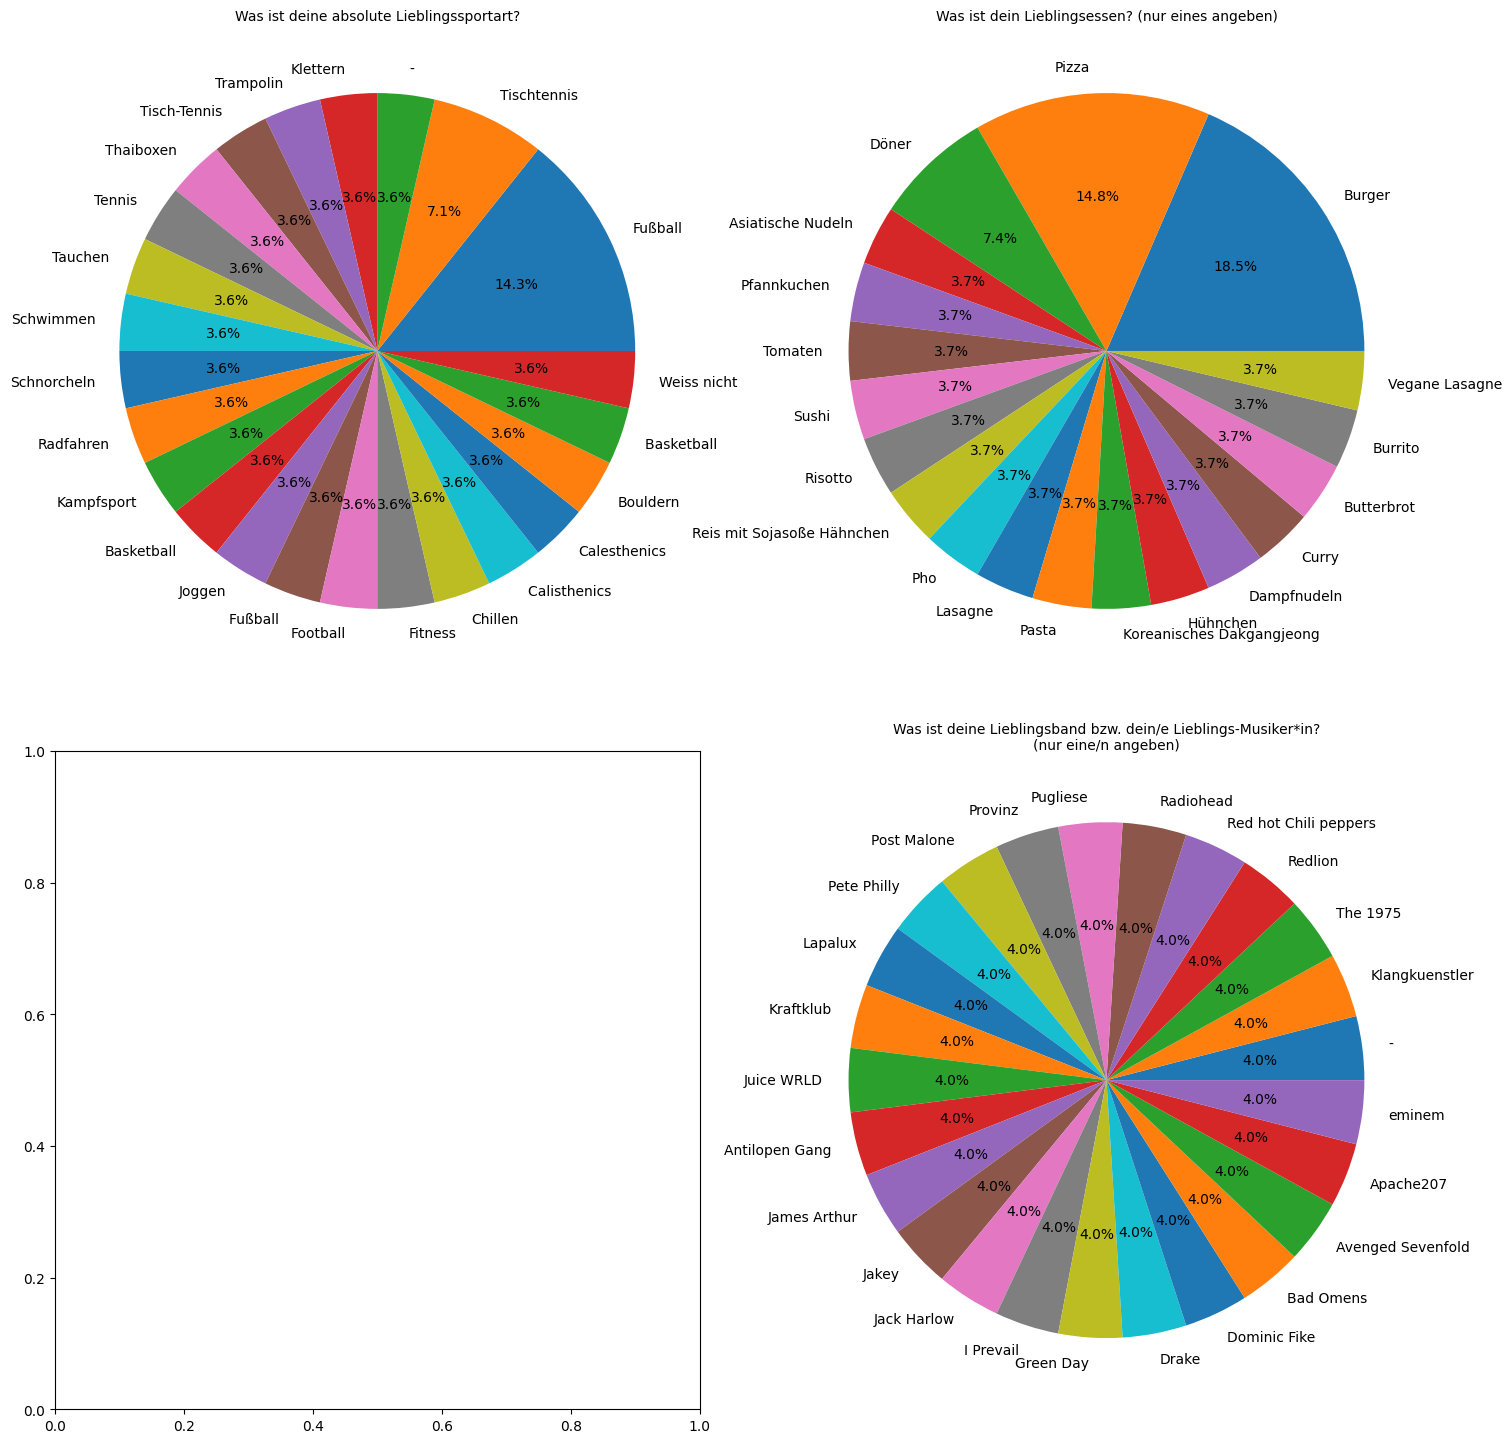

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=3)

data.value_counts(columns.lieblingssportart).plot.pie(ax=axes[0, 0], title=columns.lieblingssportart, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsessen).plot.pie(ax=axes[0, 1], title=columns.lieblingsessen, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsmusiker).plot.pie(ax=axes[1, 1], title=columns.lieblingsmusiker, ylabel="", autopct='%1.1f%%')

## Erkenntnisse ##

--> Fußball, Basketball und Calesthenics treten bei den Lieblingssportarten 2x als unterschiedliche Werte aus (z. B. aufgrund von der Schreibweise) (DONE: Bereits zusammengeführt) \
--> Jemand hat bei Lieblingssportart "Weiß nicht" und jemand "-" geantwortet \
--> Außerdem hat jemand "Chillen" geantwortet \
--> Tauchen und Schnorcheln könnte man ggf. auch zusammenführen?

--> Bei Lieblingsmusiker/-band hat auch jemand mit "-" geantwortet

In [63]:
# trim all strings in the column "lieblingssportart"
data[columns.lieblingssportart] = data[columns.lieblingssportart].str.strip()
data[columns.lieblingssportart].value_counts()

Was ist deine absolute Lieblingssportart?
Fußball         5
Basketball      2
Tischtennis     2
Joggen          1
Radfahren       1
Schwimmen       1
Tisch-Tennis    1
Tauchen         1
Calesthenics    1
Calisthenics    1
Thaiboxen       1
Football        1
Kampfsport      1
Weiss nicht     1
Tennis          1
Schnorcheln     1
Chillen         1
Bouldern        1
Klettern        1
Trampolin       1
-               1
Fitness         1
Name: count, dtype: int64

In [64]:
# combine "Calesthenics" and "Calisthenics" into one category
data[columns.lieblingssportart] = data[columns.lieblingssportart].replace("Calesthenics", "Calisthenics")

<Axes: title={'center': 'Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)'}>

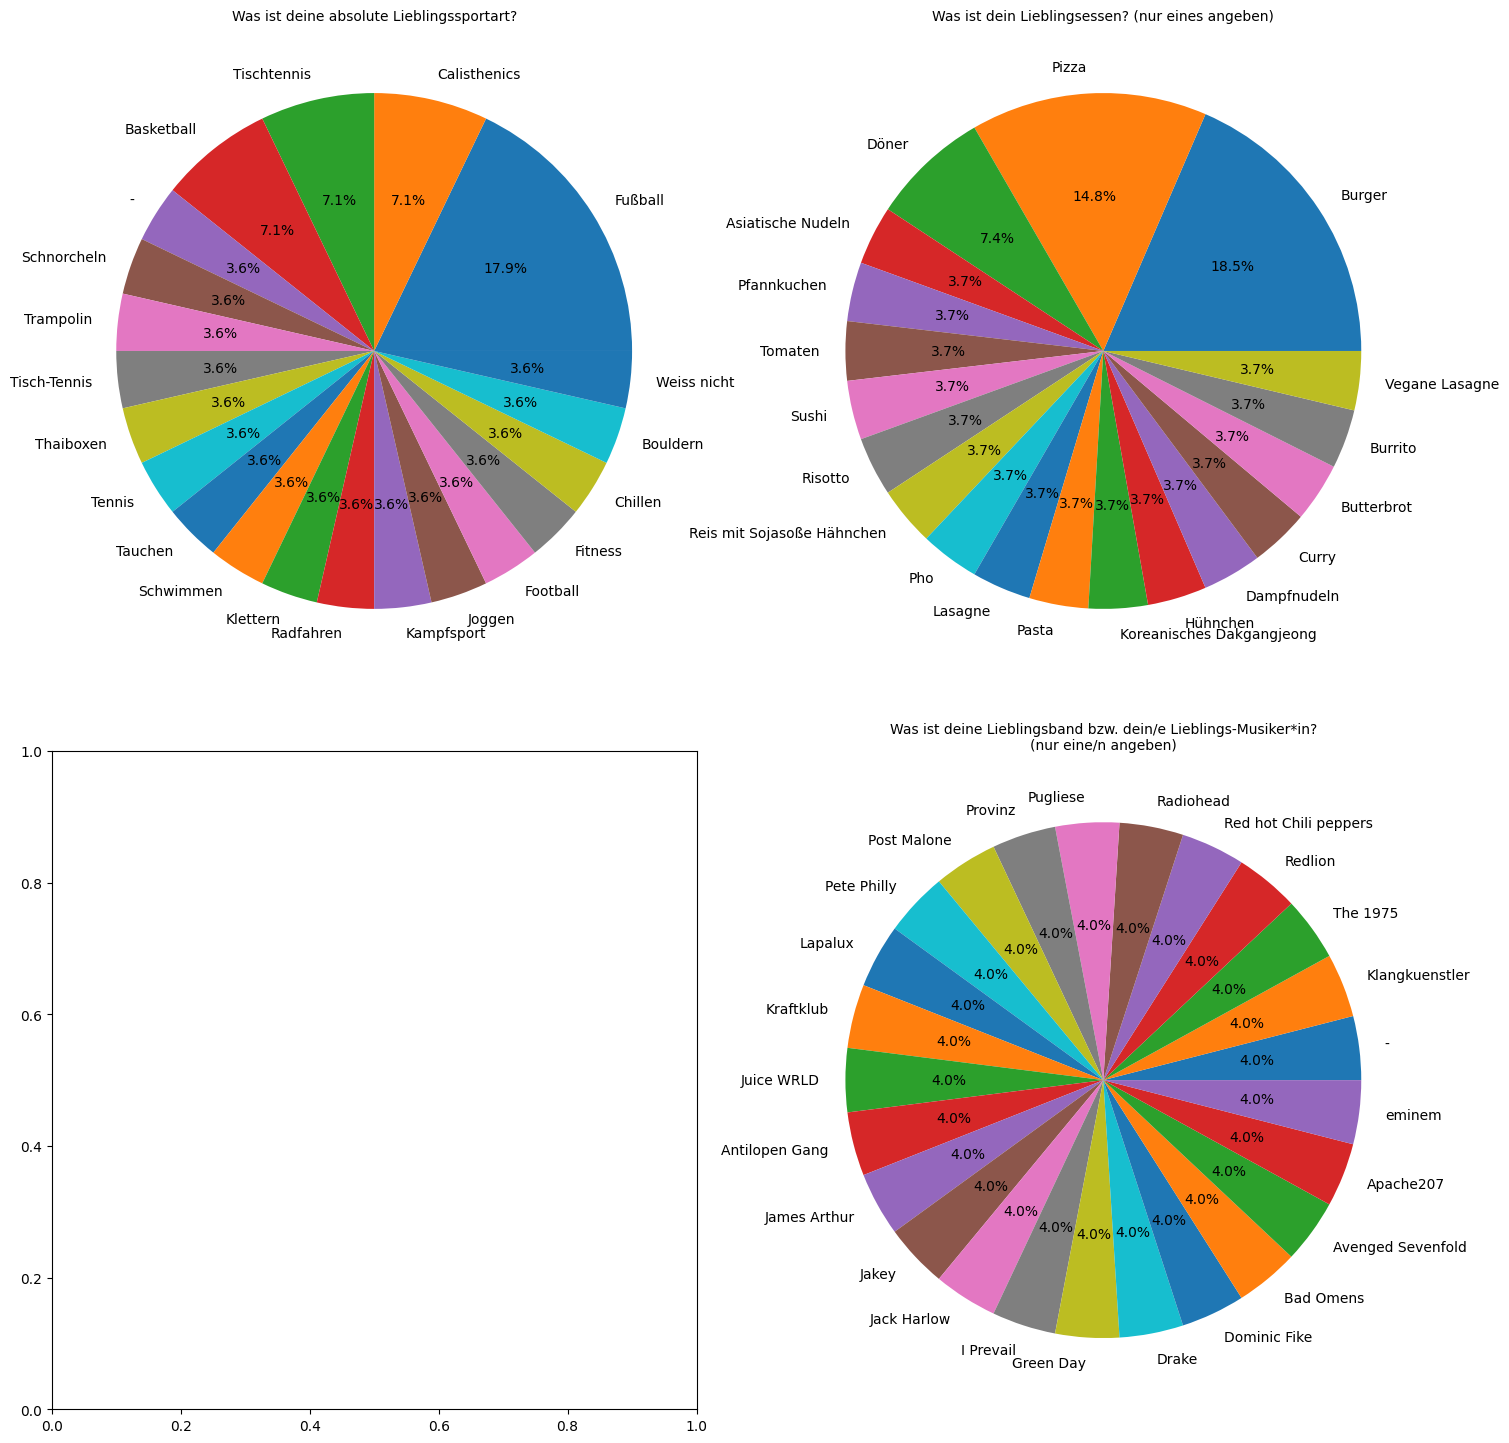

In [65]:
# plot again
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=3)

data.value_counts(columns.lieblingssportart).plot.pie(ax=axes[0, 0], title=columns.lieblingssportart, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsessen).plot.pie(ax=axes[0, 1], title=columns.lieblingsessen, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsmusiker).plot.pie(ax=axes[1, 1], title=columns.lieblingsmusiker, ylabel="", autopct='%1.1f%%')

# TODO: Hier noch "Lieblingssportart", "Lieblingsessen" und "Lieblingsmusiker/-band" encoden #

--> Wahrscheinlich am sinnvollsten mit One Hot Encoding, weil es ja nur eine Nominalskala und keine Ordinalskala ist (also nicht geordnet --> Label Encoding würde eine nicht vorhandene Rangordnung reinbringen, die wir vermeiden wollen)

--> Sollten wir machen, damit z. B. die Korrelationsanalyse auch diese Features mit einbezieht

### Sportarten (jeweils die Anzahl der Menschen, die diese im Multiselect ausgewählt haben (0) oder nicht (1)) ###

[Text(0, 0, '23'), Text(0, 0, '5')]

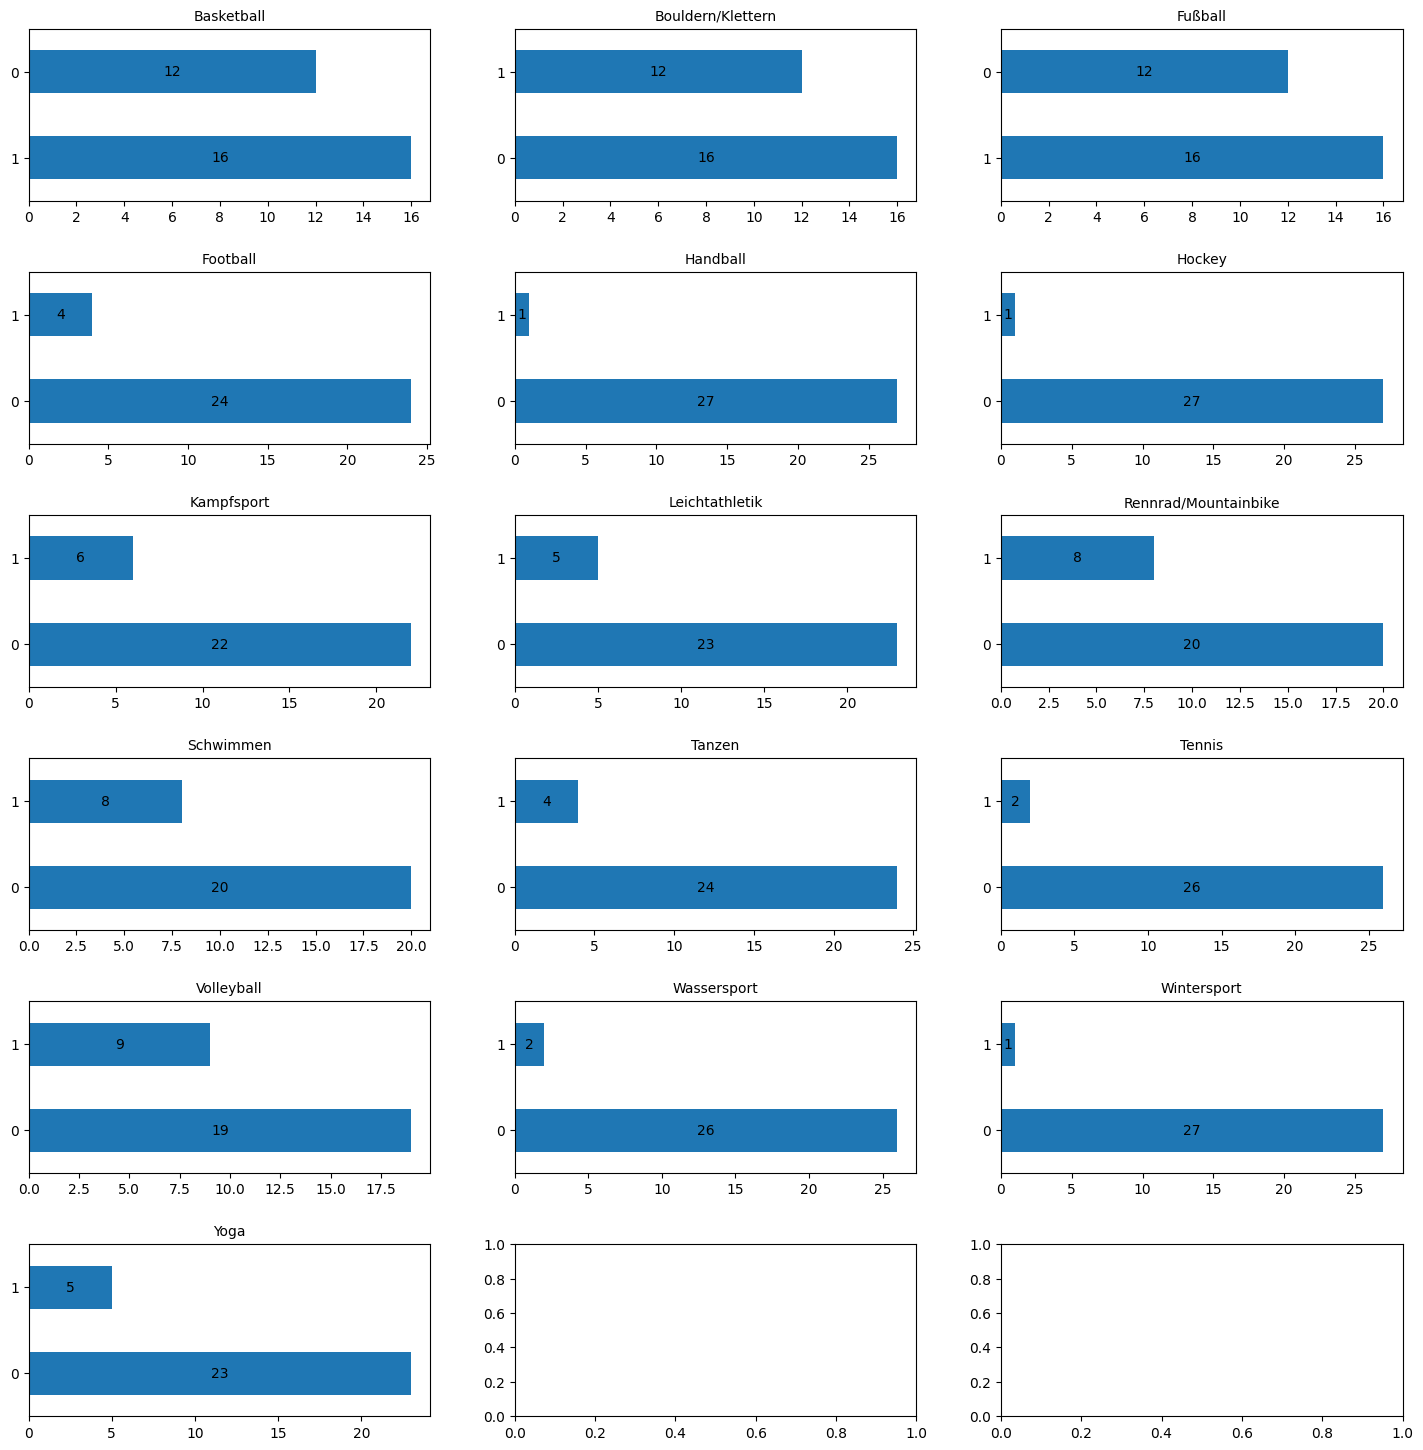

In [66]:
fig, axes = plt.subplots(6, 3, figsize=(15, 15))
fig.tight_layout(pad=3)

basketball = data.value_counts(columns.Basketball).plot.barh(ax=axes[0, 0], title=columns.Basketball, ylabel="")
basketball.bar_label(basketball.containers[0], fmt='%.0f', label_type='center')

bouldern_klettern = data.value_counts(columns["Bouldern/Klettern"]).plot.barh(ax=axes[0, 1], title=columns["Bouldern/Klettern"], ylabel="")
bouldern_klettern.bar_label(bouldern_klettern.containers[0], fmt='%.0f', label_type='center')

fussball = data.value_counts(columns.Fußball).plot.barh(ax=axes[0, 2], title=columns.Fußball, ylabel="")
fussball.bar_label(fussball.containers[0], fmt='%.0f', label_type='center')

football = data.value_counts(columns.Football).plot.barh(ax=axes[1, 0], title=columns.Football, ylabel="")
football.bar_label(football.containers[0], fmt='%.0f', label_type='center')

handball = data.value_counts(columns.Handball).plot.barh(ax=axes[1, 1], title=columns.Handball, ylabel="")
handball.bar_label(handball.containers[0], fmt='%.0f', label_type='center')

hockey = data.value_counts(columns.Hockey).plot.barh(ax=axes[1, 2], title=columns.Hockey, ylabel="")
hockey.bar_label(hockey.containers[0], fmt='%.0f', label_type='center')

kampfsport = data.value_counts(columns.Kampfsport).plot.barh(ax=axes[2, 0], title=columns.Kampfsport, ylabel="")
kampfsport.bar_label(kampfsport.containers[0], fmt='%.0f', label_type='center')

leichtathletik = data.value_counts(columns.Leichtathletik).plot.barh(ax=axes[2, 1], title=columns.Leichtathletik, ylabel="")
leichtathletik.bar_label(leichtathletik.containers[0], fmt='%.0f', label_type='center')

rennrad_mountainbike = data.value_counts(columns["Rennrad/Mountainbike"]).plot.barh(ax=axes[2, 2], title=columns["Rennrad/Mountainbike"], ylabel="")
rennrad_mountainbike.bar_label(rennrad_mountainbike.containers[0], fmt='%.0f', label_type='center')

schwimmen = data.value_counts(columns.Schwimmen).plot.barh(ax=axes[3, 0], title=columns.Schwimmen, ylabel="")
schwimmen.bar_label(schwimmen.containers[0], fmt='%.0f', label_type='center')

tanzen = data.value_counts(columns.Tanzen).plot.barh(ax=axes[3, 1], title=columns.Tanzen, ylabel="")
tanzen.bar_label(tanzen.containers[0], fmt='%.0f', label_type='center')

tennis = data.value_counts(columns.Tennis).plot.barh(ax=axes[3, 2], title=columns.Tennis, ylabel="")
tennis.bar_label(tennis.containers[0], fmt='%.0f', label_type='center')

volleyball = data.value_counts(columns.Volleyball).plot.barh(ax=axes[4, 0], title=columns.Volleyball, ylabel="")
volleyball.bar_label(volleyball.containers[0], fmt='%.0f', label_type='center')

wassersport = data.value_counts(columns.Wassersport).plot.barh(ax=axes[4, 1], title=columns.Wassersport, ylabel="")
wassersport.bar_label(wassersport.containers[0], fmt='%.0f', label_type='center')

wintersport = data.value_counts(columns.Wintersport).plot.barh(ax=axes[4, 2], title=columns.Wintersport, ylabel="")
wintersport.bar_label(wintersport.containers[0], fmt='%.0f', label_type='center')

yoga = data.value_counts(columns.Yoga).plot.barh(ax=axes[5, 0], title=columns.Yoga, ylabel="")
yoga.bar_label(yoga.containers[0], fmt='%.0f', label_type='center')

## Korrelationen untersuchen ##

<Axes: >

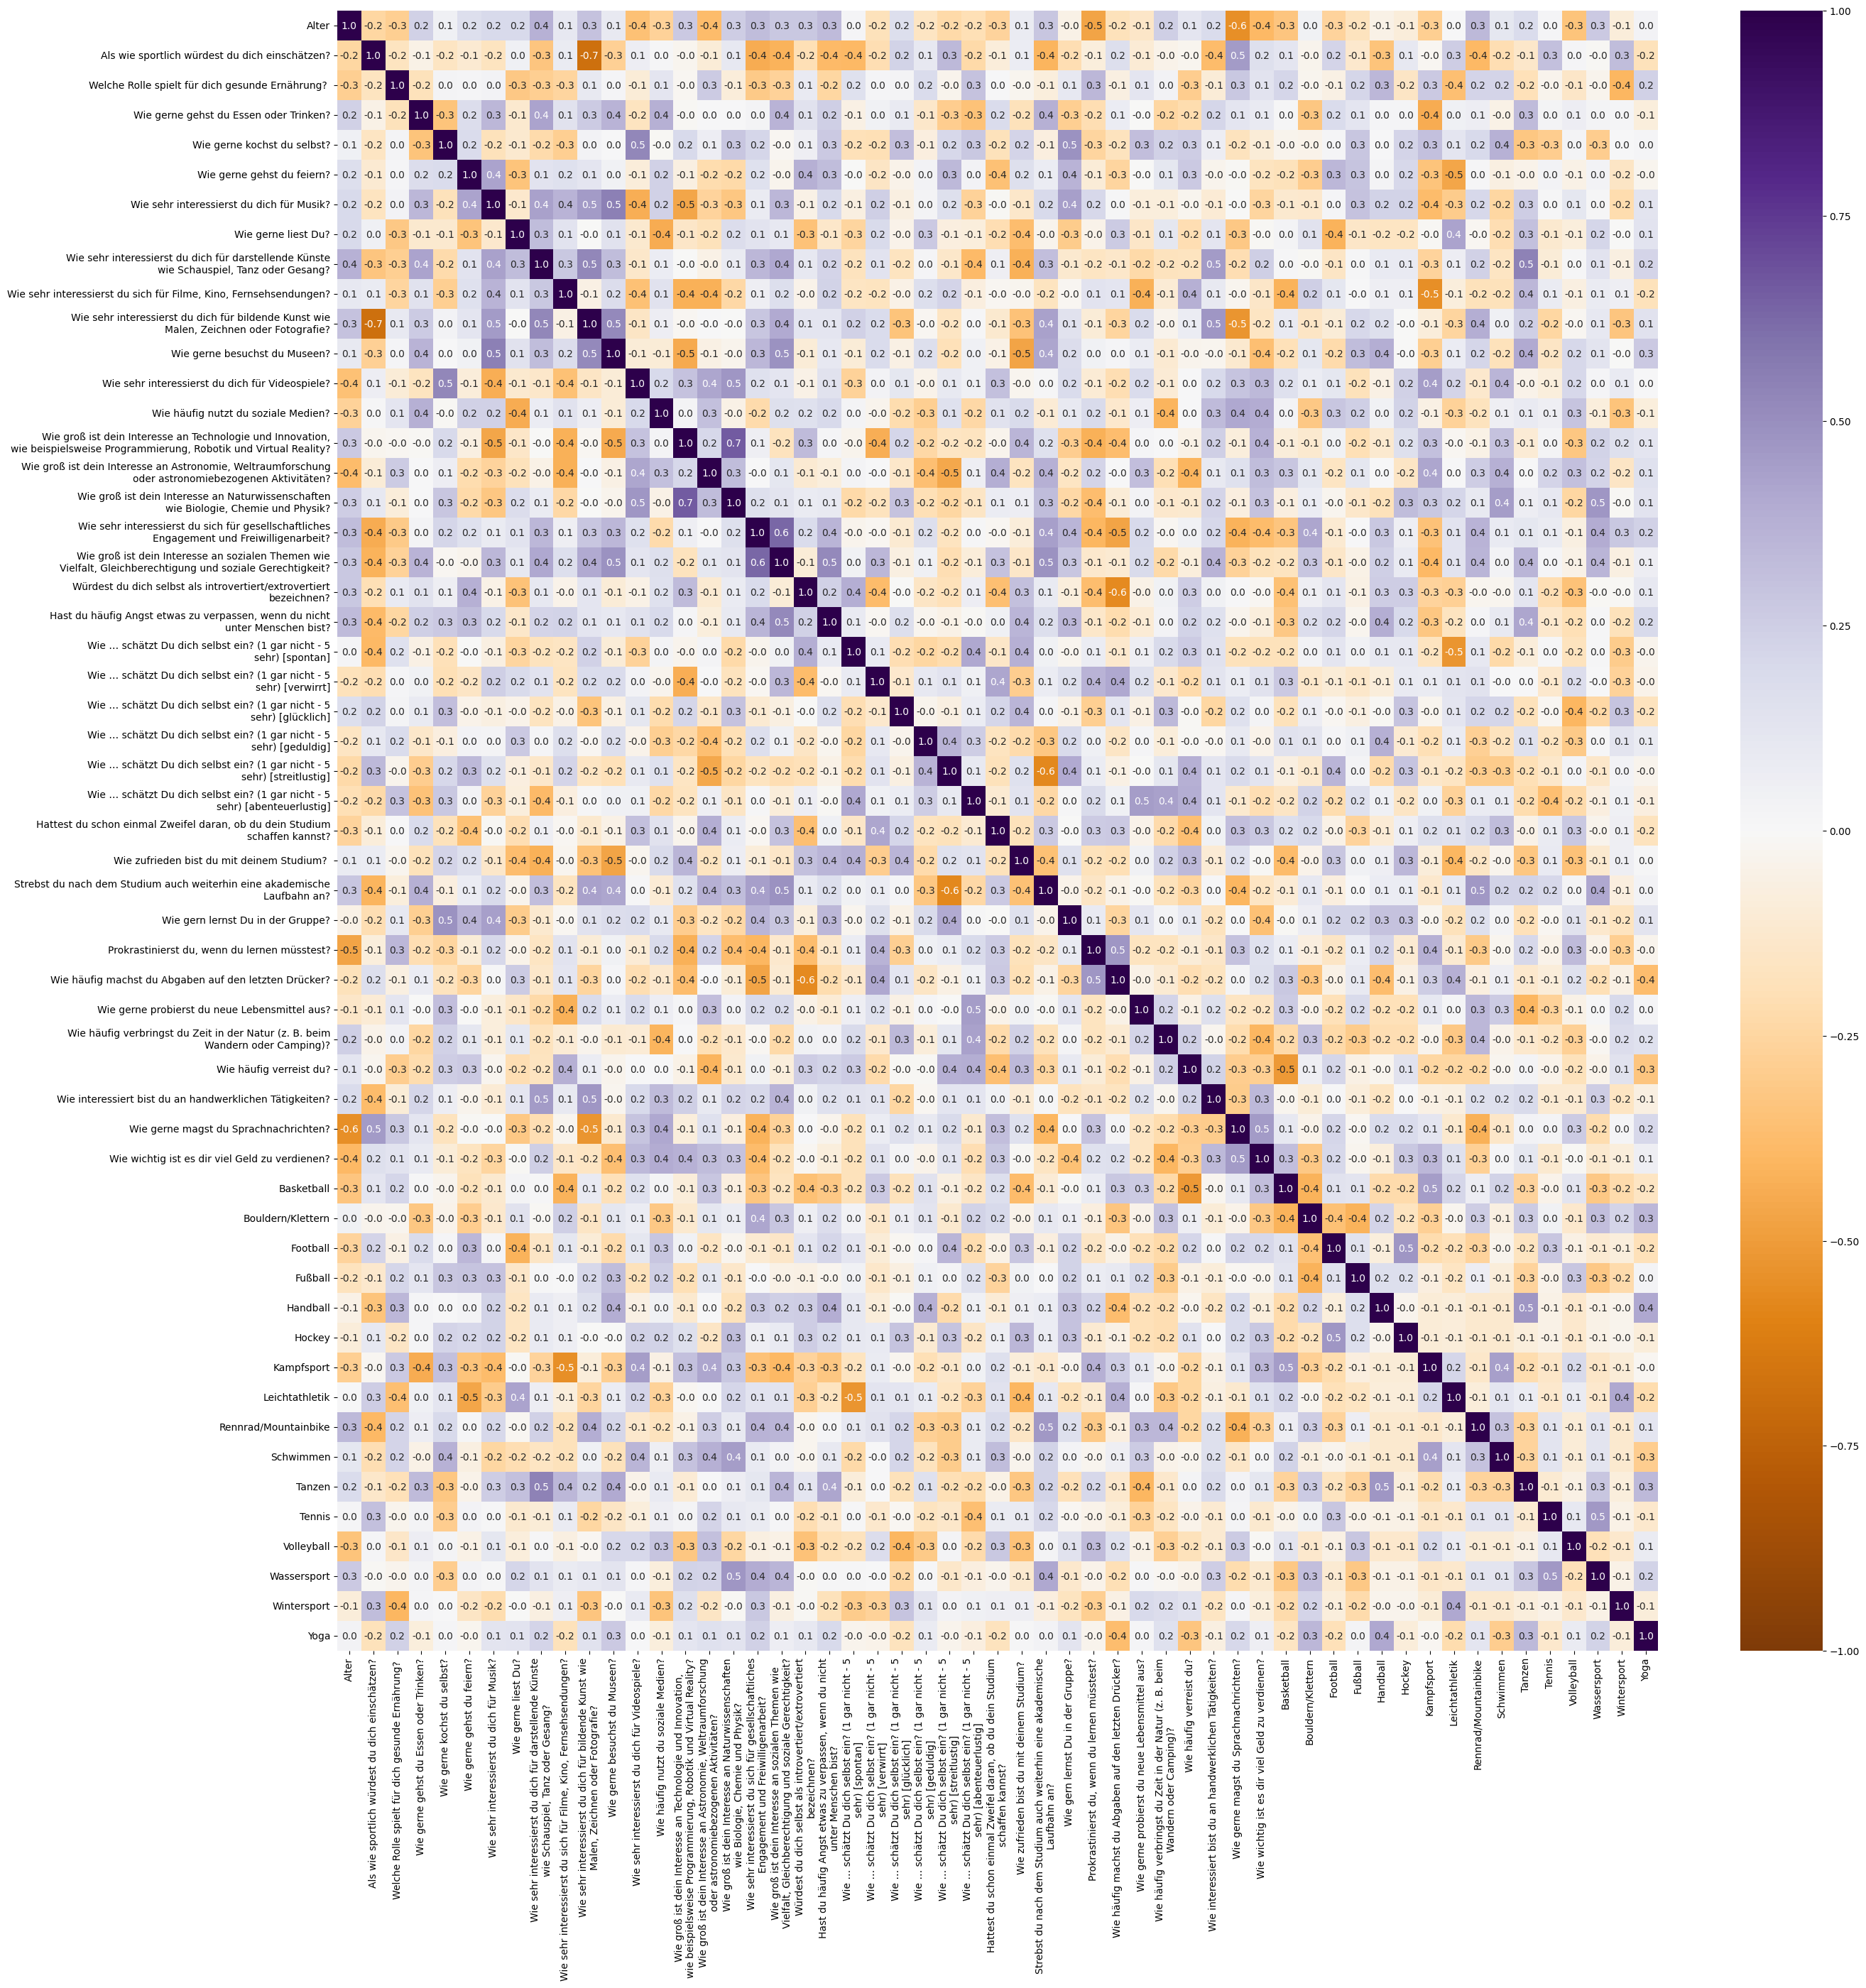

In [67]:
fig, ax = plt.subplots(figsize=(30, 30))

sb.heatmap(data.corr(numeric_only=True),
           annot=True, cmap="PuOr",fmt=".1f",
           vmin=-1, vmax=1)

# TODO: Sinnige Pairplots aussuchen statt random #

z. B. welche mit starken Korrelationen

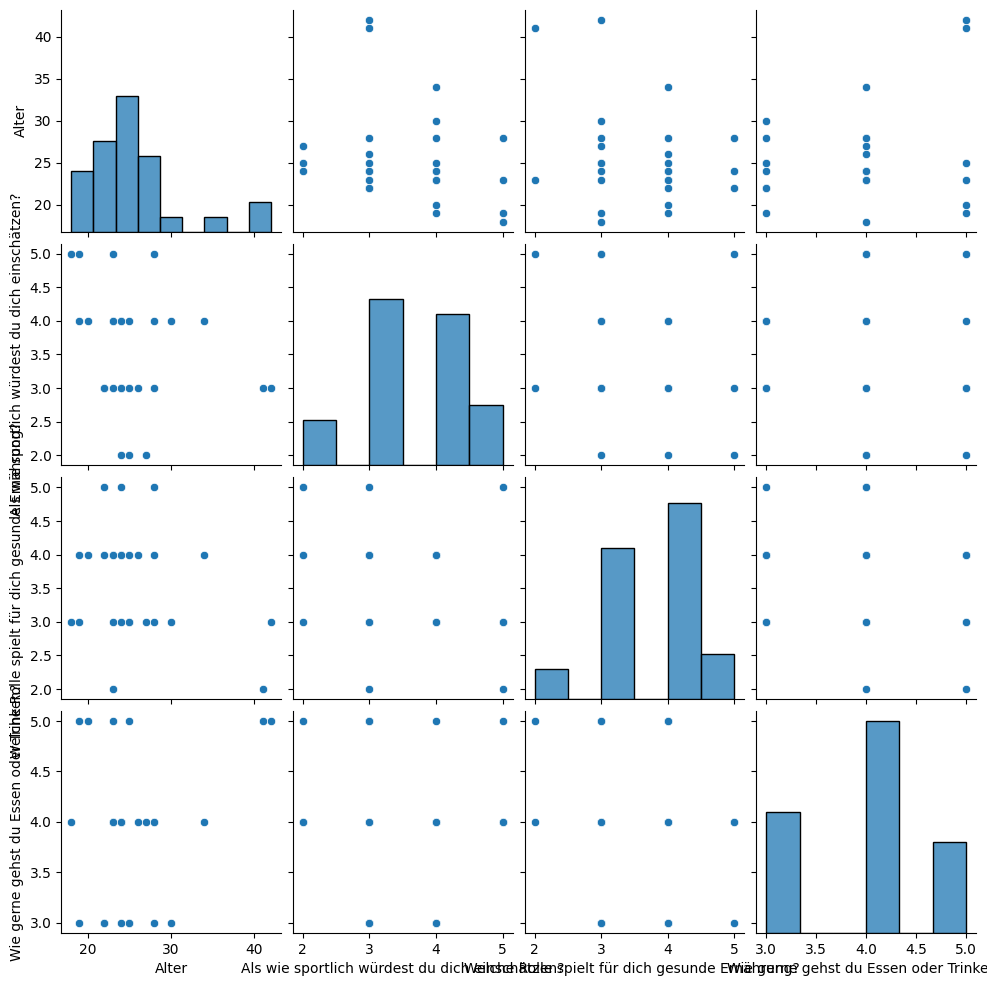

In [68]:
sb.pairplot(data.iloc[:,:10], diag_kind="hist")

# TODO: Welche Features wollen wir (vielleicht) nicht mit einbeziehen? #

Auf jeden Fall das Pseudonym und den Timestamp!

Z. B. das Alter, das Geschlecht, die Funktion an der HSD, den Studiengang?

In [69]:
columns_to_drop = [columns.pseudonym, columns.timestamp]
data = data.drop(columns_to_drop, axis=1)

data

,Alter,Geschlecht,Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?,Welchem Studiengang fühlst du dich am meisten zugehörig?,Als wie sportlich würdest du dich einschätzen?,Was ist deine absolute Lieblingssportart?,Welche Rolle spielt für dich gesunde Ernährung?,Wie gerne gehst du Essen oder Trinken?,Wie gerne kochst du selbst?,Wie gerne gehst du feiern?,...,Kampfsport,Leichtathletik,Rennrad/Mountainbike,Schwimmen,Tanzen,Tennis,Volleyball,Wassersport,Wintersport,Yoga
0,28,männlich,Student*in,MMI,4,Joggen,4,3,4,3,...,0,0,1,0,0,0,0,0,0,1
1,26,männlich,Student*in,MMI,3,Fußball,4,4,5,2,...,0,0,1,0,0,0,1,0,0,1
2,24,männlich,Student*in,MMI,2,-,5,4,4,3,...,0,0,0,0,1,0,0,0,0,1
3,23,männlich,Student*in,MMI,5,Trampolin,2,4,4,2,...,0,1,0,0,0,0,0,0,1,0
4,24,weiblich,Student*in,MMI,3,Klettern,4,3,2,1,...,0,0,0,0,0,0,0,0,0,0
5,30,männlich,Student*in,MMI,4,Bouldern,3,3,5,4,...,0,0,0,0,0,0,0,0,0,0
6,41,weiblich,Student*in,MMI,3,Chillen,2,5,3,3,...,0,0,0,0,1,0,0,0,0,0
7,24,männlich,Student*in,MMI,3,Fußball,3,4,5,3,...,0,0,0,0,0,0,1,0,0,0
8,42,männlich,Dozent*in,DAISY,3,Schnorcheln,3,5,5,3,...,0,1,1,1,0,0,0,0,0,0
9,34,männlich,Wissenschaftliche*r Mitarbeiter*in,BMI,4,Tennis,4,4,3,2,...,0,0,1,1,0,1,0,1,0,0


# Clustering #

In [70]:
# Scale the data first

from sklearn.preprocessing import StandardScaler

# Create a copy of data (with only numerical values)
data_numerical = data.copy().select_dtypes(include='number')

print(data_numerical.value_counts())

# TODO: Maybe create a subset of the dataframe here by dropping features we don't want to include in the clustering

# Scale the data
scaler = StandardScaler()
scaler.fit(data_numerical)
data_scaled = pd.DataFrame(scaler.transform(data_numerical),
                           columns= data_numerical.columns )

Alter  Als wie sportlich würdest du dich einschätzen?  Welche Rolle spielt für dich gesunde Ernährung?   Wie gerne gehst du Essen oder Trinken?  Wie gerne kochst du selbst?  Wie gerne gehst du feiern?  Wie sehr interessierst du dich für Musik?  Wie gerne liest Du?  Wie sehr interessierst du dich für darstellende Künste\nwie Schauspiel, Tanz oder Gesang?  Wie sehr interessierst du sich für Filme, Kino, Fernsehsendungen?  Wie sehr interessierst du dich für bildende Kunst wie\nMalen, Zeichnen oder Fotografie?  Wie gerne besuchst du Museen?  Wie sehr interessierst du dich für Videospiele?  Wie häufig nutzt du soziale Medien?  Wie groß ist dein Interesse an Technologie und Innovation,\nwie beispielsweise Programmierung, Robotik und Virtual Reality?  Wie groß ist dein Interesse an Astronomie, Weltraumforschung\noder astronomiebezogenen Aktivitäten?  Wie groß ist dein Interesse an Naturwissenschaften\nwie Biologie, Chemie und Physik?  Wie sehr interessierst du sich für gesellschaftliches\nEng

In [71]:
data_scaled.head()

,Alter,Als wie sportlich würdest du dich einschätzen?,Welche Rolle spielt für dich gesunde Ernährung?,Wie gerne gehst du Essen oder Trinken?,Wie gerne kochst du selbst?,Wie gerne gehst du feiern?,Wie sehr interessierst du dich für Musik?,Wie gerne liest Du?,"Wie sehr interessierst du dich für darstellende Künste\nwie Schauspiel, Tanz oder Gesang?","Wie sehr interessierst du sich für Filme, Kino, Fernsehsendungen?",...,Kampfsport,Leichtathletik,Rennrad/Mountainbike,Schwimmen,Tanzen,Tennis,Volleyball,Wassersport,Wintersport,Yoga
0,0.444404,0.536567,0.509019,-1.319950,0.039436,0.13484,1.196958,0.760941,0.485071,-0.860916,...,-0.522233,-0.466252,1.581139,-0.632456,-0.408248,-0.27735,-0.688247,-0.27735,-0.192450,2.144761
1,0.083728,-0.619116,0.509019,0.101535,1.143648,-0.80904,0.041274,-0.817307,0.485071,0.286972,...,-0.522233,-0.466252,1.581139,-0.632456,-0.408248,-0.27735,1.452966,-0.27735,-0.192450,2.144761
2,-0.276947,-1.774800,1.804705,0.101535,0.039436,0.13484,1.196958,-0.817307,0.485071,0.286972,...,-0.522233,-0.466252,-0.632456,-0.632456,2.449490,-0.27735,-0.688247,-0.27735,-0.192450,2.144761
3,-0.457285,1.692251,-2.082352,0.101535,0.039436,-0.80904,-1.114409,-0.028183,-0.363803,0.286972,...,-0.522233,2.144761,-0.632456,-0.632456,-0.408248,-0.27735,-0.688247,-0.27735,5.196152,-0.466252
4,-0.276947,-0.619116,0.509019,-1.319950,-2.168988,-1.75292,-1.114409,0.760941,-0.363803,1.434860,...,-0.522233,-0.466252,-0.632456,-0.632456,-0.408248,-0.27735,-0.688247,-0.27735,-0.192450,-0.466252


In [72]:
from sklearn.cluster import KMeans

# TODO: Parameter tuning!
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)

c:\Users\Janne\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:
data["cluster"] = kmeans.labels_

# TODO: Sinnvolle Plots finden und daraus Schlüsse ziehen #

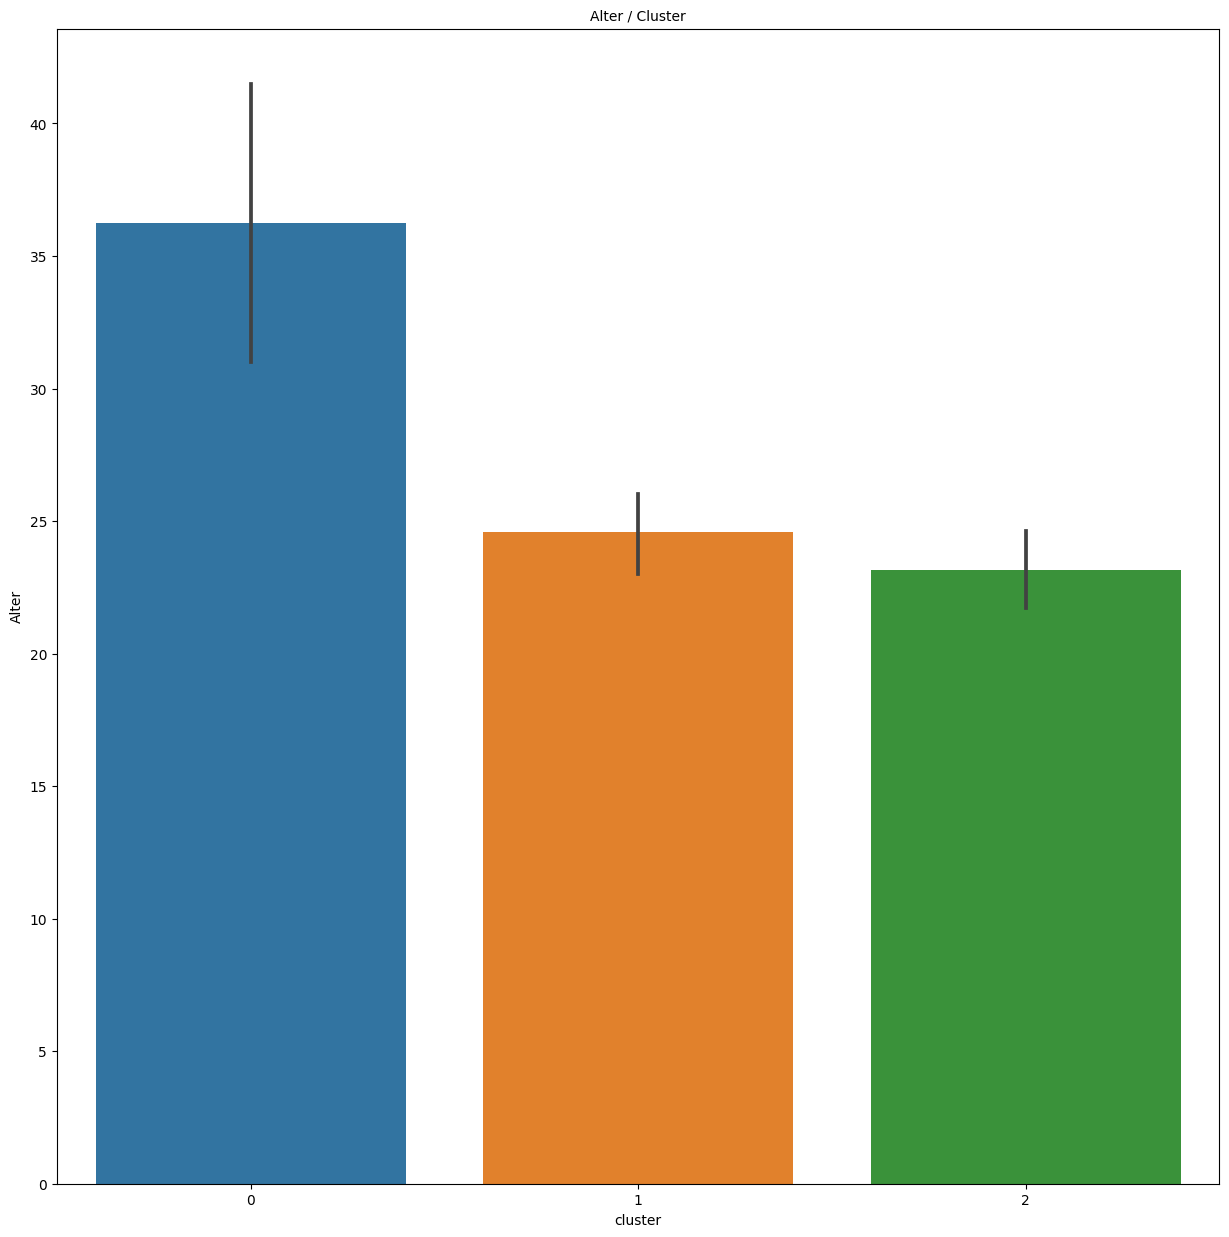

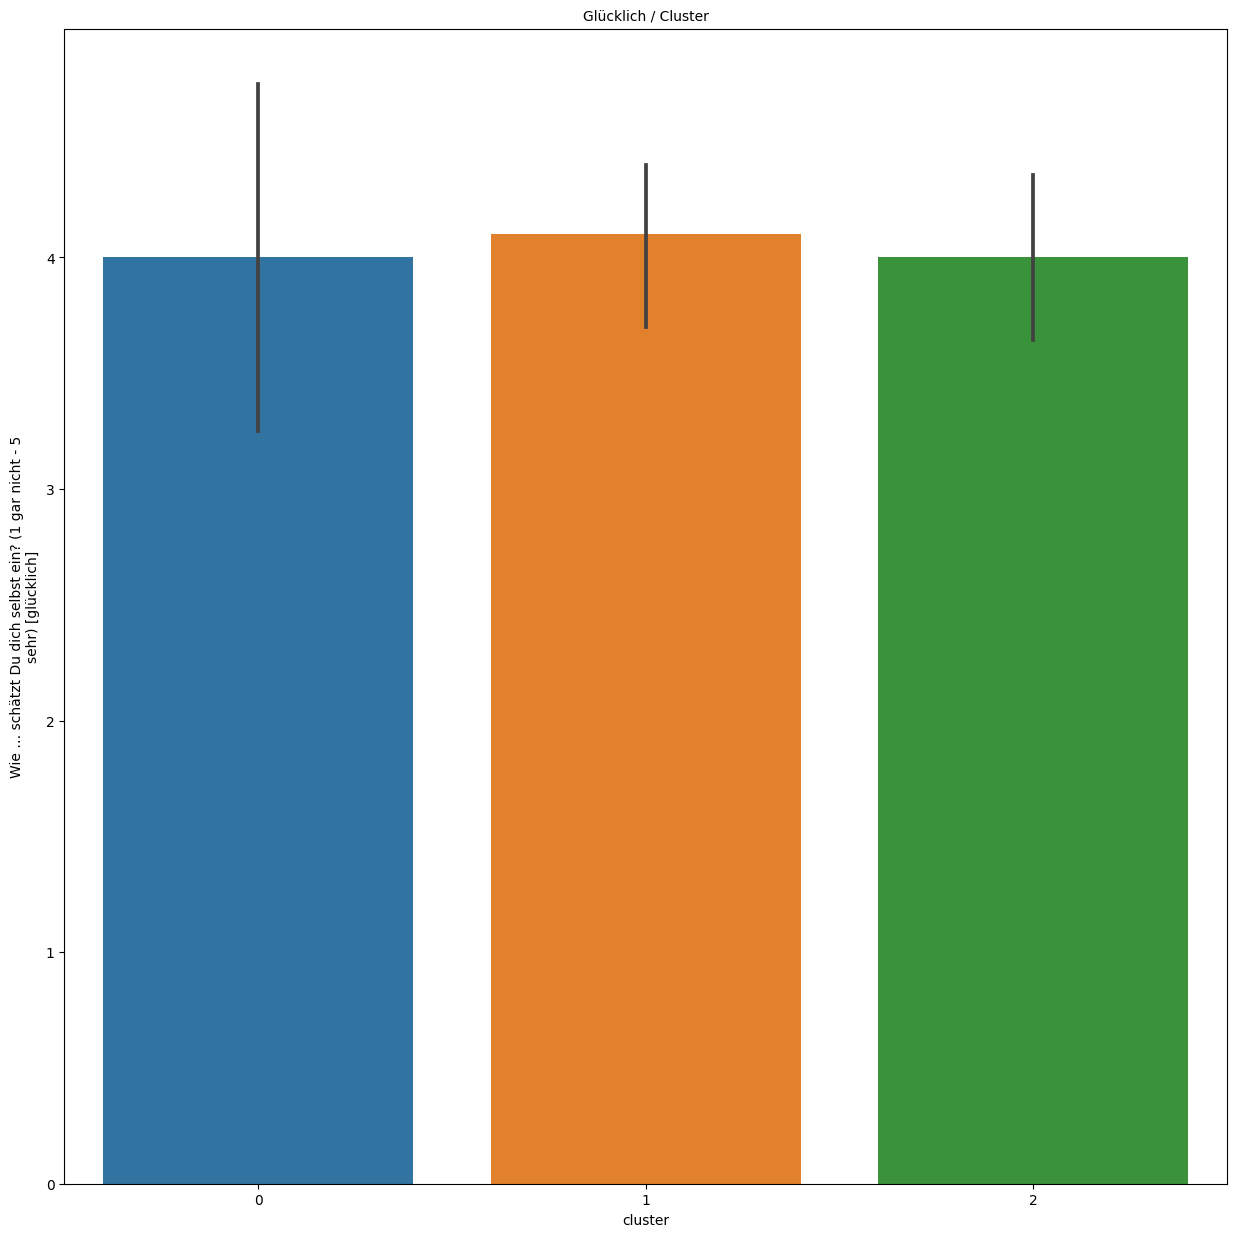

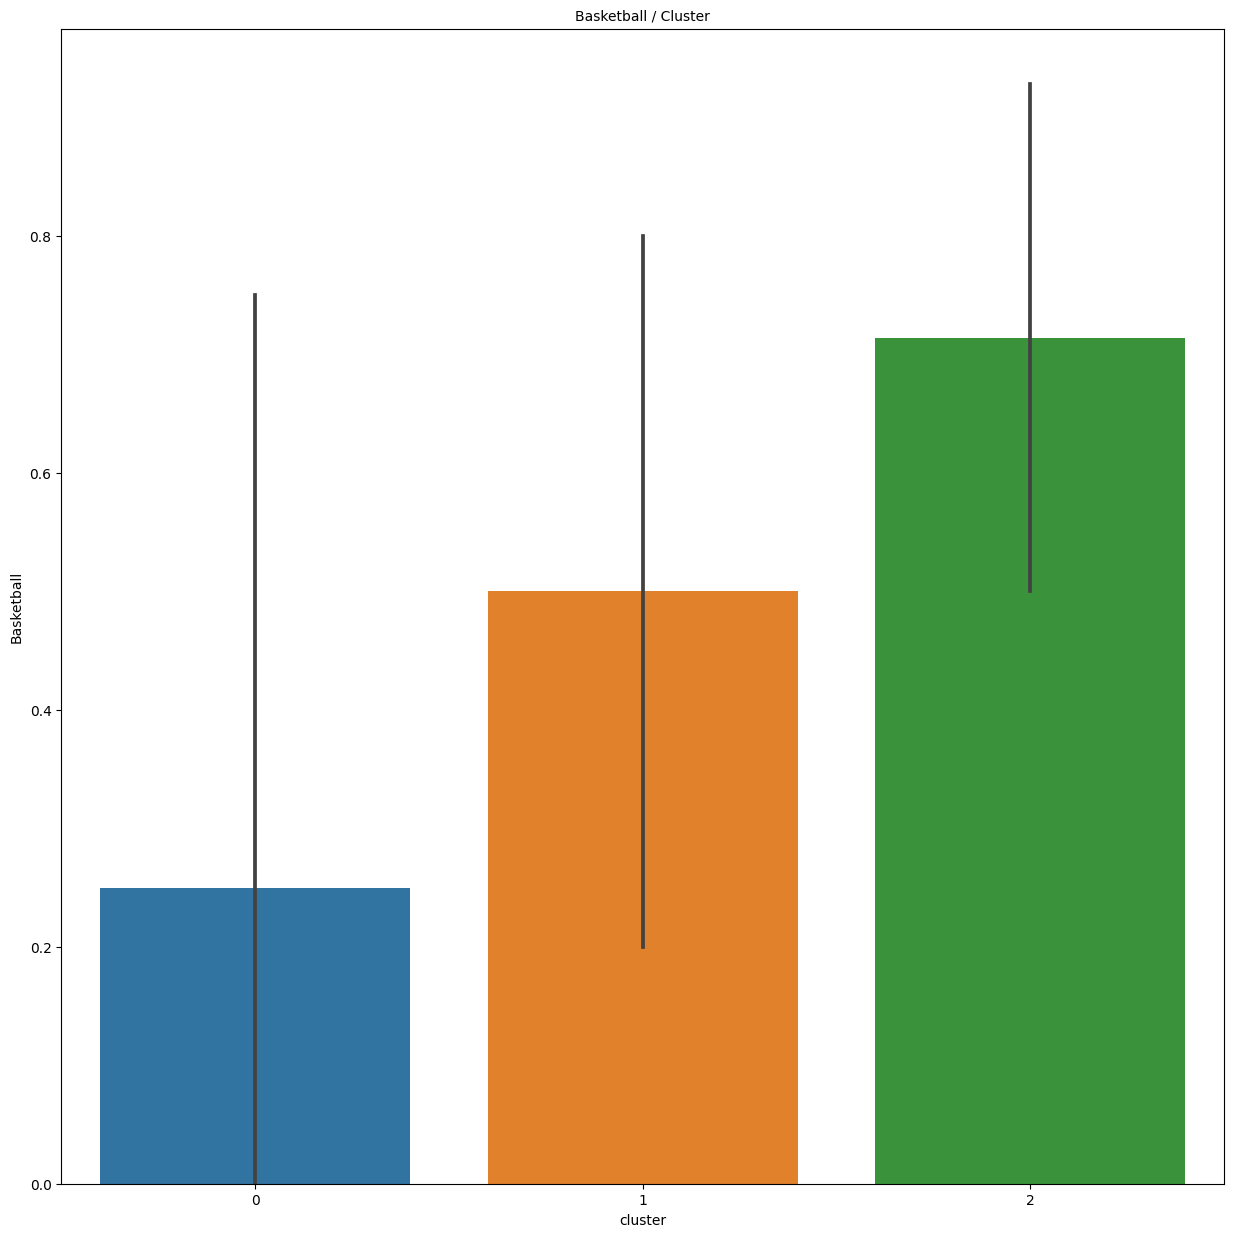

In [74]:
sb.barplot(x='cluster', y=columns.alter, data=data)
plt.title("Alter / Cluster")
plt.show()

sb.barplot(x='cluster', y=columns.gluecklich, data=data)
plt.title("Glücklich / Cluster")
plt.show()

sb.barplot(x='cluster', y=columns.Basketball, data=data)
plt.title("Basketball / Cluster")
plt.show()

<Axes: xlabel='cluster', ylabel='Welche Rolle spielt für dich gesunde Ernährung? '>

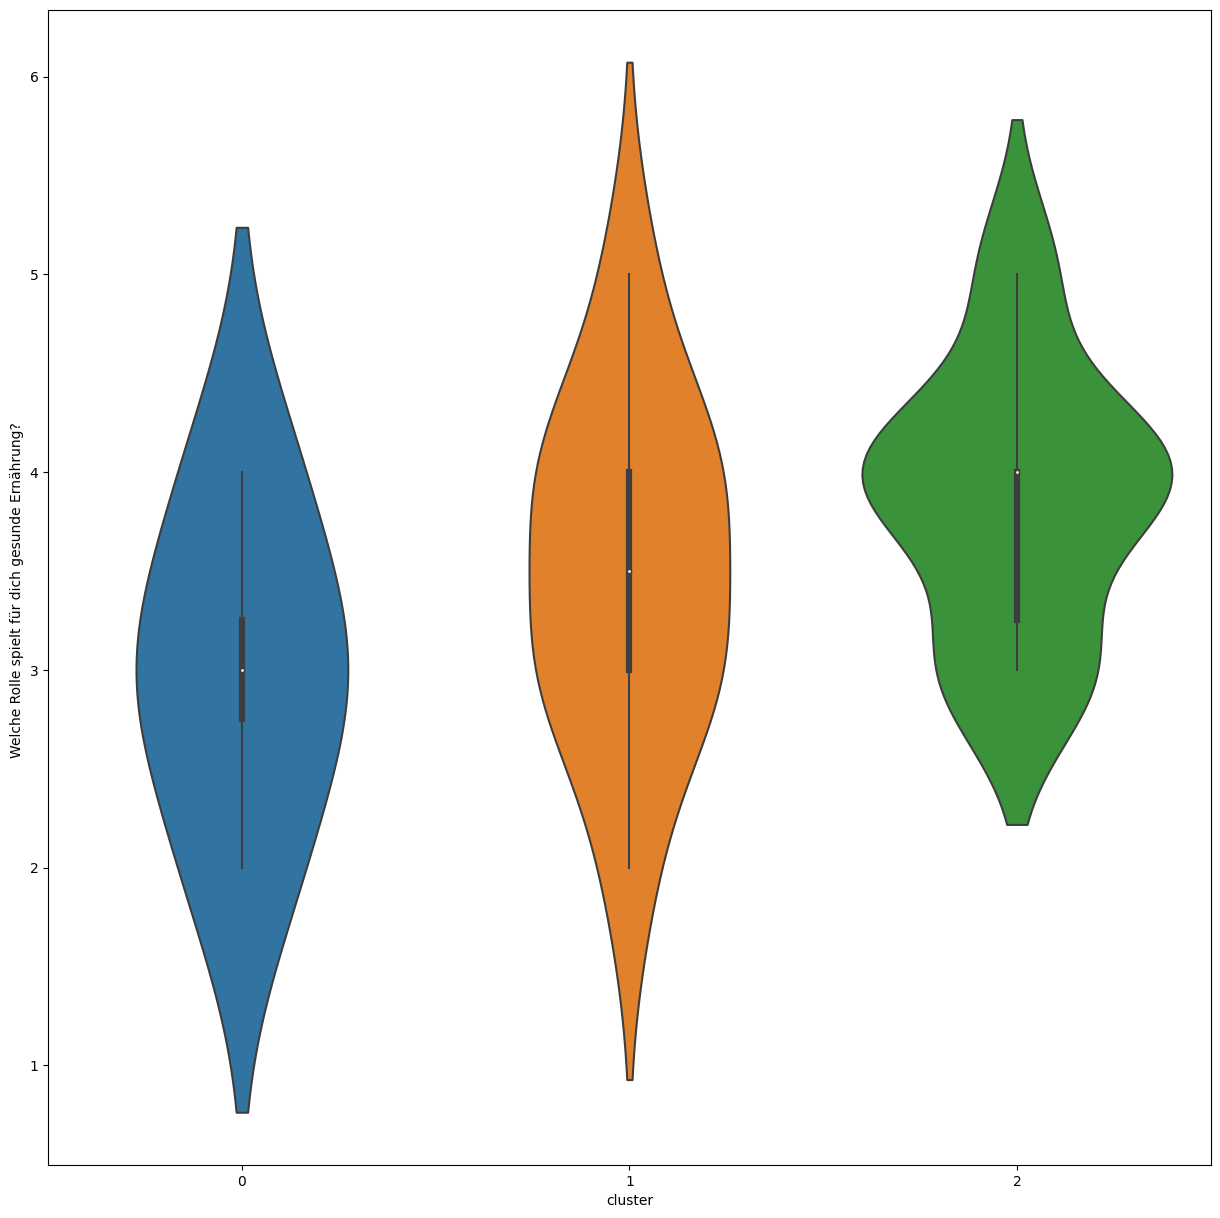

In [76]:
sb.violinplot(data=data, y=columns.ernaehrung, x="cluster")

# TODO: Weitere Algorithmen ausprobieren und Schlüsse aus den Ergebnissen ziehen #

z. B. DBSCAN